In [4]:
import pickle
import shutil
import sys
import time

# NumPy and TensorFlow
import numpy as np
import pandas as pd
import tensorflow as tf


import nltk
nltk.download("punkt")

sys.path.append("..")
from features import common
from IPython.display import Image, HTML

[nltk_data] Downloading package punkt to /Users/koza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
print "Loading dataset..."
with open("/Users/koza/Documents/UCBerkeley/266/FinalProject/w266_Project/data/ka-comments-balanced.pickle", "rb") as f:
    comments_dataset = pickle.load(f)    
print "Done."

Loading dataset...
Done.


In [5]:
comments_dataset.keys()

['test_data', 'validate_data', 'train_data']

In [49]:
cont = comments_dataset['train_data']['content']

max([len(x.split(" ")) for x in cont])


144946

In [30]:
comments_dataset['validate_data'].head()

,video,id,content,authorKaid,answerCount,replyCount,date,sumVotesIncremented,qualityKind,replyTo,hasVotes,daysAgo
1121947,red-blood-cells,9d9b14e4f3ad0a5b880b0f07994b5968fb73f22e,So if red blood cells don't have a nucleus or ...,kaid_44120904628983977981481,4,0,2015-04-09 04:12:50,3,normal,NaN,True,-556.0
328701,u06-l3-t1-we3-graphing-systems-of-inequalities,b750884ce9b35590722b26784089438d55725fcd,i am curious to know how do you choose a metho...,kaid_948870409346085076130951,1,0,2015-01-06 00:48:52,1,normal,NaN,False,-650.0
1121948,red-blood-cells,97480f4ab7de81490066e4f35a5b83bf22809f97,"Yes, they are still alive, though they are muc...",kaid_307824112960266188712239,0,0,2015-04-25 10:13:01,2,normal,9d9b14e4f3ad0a5b880b0f07994b5968fb73f22e,True,-540.0
328702,u06-l3-t1-we3-graphing-systems-of-inequalities,f0152819e70b718930d888f600c12abe9607e021,use substitution when one equation is solved f...,kaid_241187678886463692372002,0,0,2015-01-06 01:01:41,1,normal,b750884ce9b35590722b26784089438d55725fcd,False,-650.0
1121950,red-blood-cells,a17eb6514e8bbca153abe4deff6de3463bc33553,He makes it sound like the veins and arteries ...,kaid_919424459975893976104648,2,0,2014-09-29 23:28:04,3,normal,NaN,True,-748.0


## The CNN does really well when using the comments_dataset['validate_data'] portion of the data. This is split into its own training and dev set 90/10, and peaks around 78% accuracy on the dev set, while the train set is basically memorized ~100% accuracy.

## I tried to run it using comments_dataset['train_data'], but my machine was not able to handle it. I reduced it down further to 50,000 datapoints, as you can see below, and it still konked out at ~57% accuracy. Not sure what's going on with this.

### There was also some data points where the length of the 'content' was like ~100k words. I thought that was weird, but have not looked at the actual data. need to check what's going on here.

In [82]:
# make positive and negative data sets
pos_data_train = comments_dataset['train_data'].loc[comments_dataset['train_data']['hasVotes'] == True]
pos_data_train = pos_data_train[pos_data_train['replyTo'].notnull()]
mask = pos_data_train['content'].str.len() < 1000

# Take just 50k examples to see if they'll even run
pos_data_train = pos_data_train.loc[mask][:50000]

neg_data_train = comments_dataset['train_data'].loc[comments_dataset['train_data']['hasVotes'] == False]
neg_data_train = neg_data_train[neg_data_train['replyTo'].notnull()]


mask = neg_data_train['content'].str.len() < 1000

# Take just 50k examples to see if they'll even run
neg_data_train = neg_data_train.loc[mask][:50000]

print max([len(x.split(" ")) for x in neg_data_train['content']])
print max([len(x.split(" ")) for x in pos_data_train['content']])

print len(neg_data_train)
print len(pos_data_train)

523
602
50000
50000


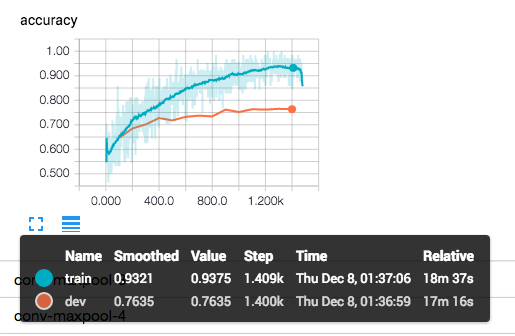

In [5]:
Image('../images/CNN-using small dataset.png')

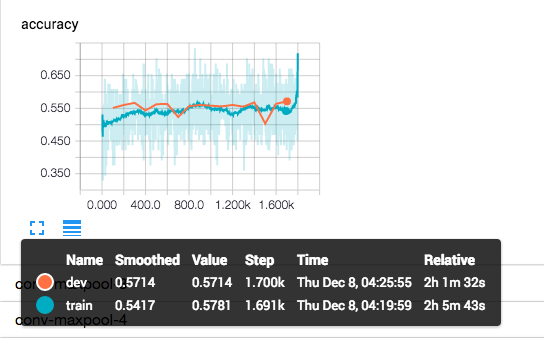

In [6]:
Image('../images/CNN-using 50k dataset.png')

In [83]:
pos_data_train.to_csv('/Users/koza/Documents/UCBerkeley/266/FinalProject/w266_Project/data/content/pos_data_train',
                      columns=['content'],
                      index=False)


neg_data_train.to_csv('/Users/koza/Documents/UCBerkeley/266/FinalProject/w266_Project/data/content/neg_data_train',
                      columns=['content'],
                      index=False)

In [78]:
# tensorboard --logdir /Users/koza/Documents/UCBerkeley/266/cnn-text-classification-tf/runs/1481173600/summaries/

In [79]:
# tensorboard --logdir /Users/koza/Documents/UCBerkeley/266/cnn-text-classification-tf/runs/1481179535/summaries/

https://arxiv.org/pdf/1510.03820v4.pdf
https://arxiv.org/pdf/1408.5882v2.pdf
https://github.com/dennybritz/cnn-text-classification-tf
http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/